## FINAL: For my final, I have decided to analyze COVID-19 Cases in the U.S. through two different data formats which are a CSV file and an Excel file. 

For the first step, I will read the data and convert a csv file to excel

In [83]:
#Reading the files
import pandas as pd
import matplotlib.pyplot as plt
state_data = pd.read_csv('StateCases.csv')
state_data.columns = state_data.columns.str.lower()

#Converting csv file to excel to display a different data format 
merged_data = pd.read_csv('MergedData.csv')
merged_data.columns = merged_data.columns.str.lower()
merged_data.to_excel (r'MergedData.xlsx', index = None, header=True)

In [84]:
print(state_data)

      submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
0             1/14/22    KS     621273    470516.0    150757.0     19414   
1              1/2/22    AS         11         NaN         NaN         0   
2              2/4/20    AR          0         NaN         NaN         0   
3             12/6/21    MP       1104      1104.0         0.0         0   
4              5/9/21    PW          0         NaN         NaN         0   
...               ...   ...        ...         ...         ...       ...   
50356         5/28/20    IA      18585         NaN         NaN       228   
50357          6/7/20    SD       5438         NaN         NaN        71   
50358         4/30/21    SD     122660         NaN         NaN       128   
50359          4/6/20    NM        686         NaN         NaN        62   
50360         3/13/21    IA     342495         NaN         NaN       425   

       pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
0        

## Data Transformations on state_data   

In [85]:
#1st data transformation to fill in empty cells with 0 using a function  
def replacezero(columnname): 
    state_data[columnname].fillna(0, inplace = True)

In [86]:
#Applying functions to specific state_data columns
replacezero("tot_cases")
replacezero("conf_cases")
replacezero("prob_cases")
replacezero("new_case")
replacezero("pnew_case")
replacezero("tot_death")
replacezero("conf_death")
replacezero("prob_death")
replacezero("new_death")
replacezero("pnew_death")


In [87]:

#Data Tansformation to remove rows with empty cells in columns consent_cases and consent_deaths

state_data.dropna(subset = ['consent_cases'], inplace = True)     # Remove rows with NaN
state_data.dropna(subset = ['consent_deaths'], inplace = True)
print(state_data) 

#Data Transformation to change submission_date to date&column type 
state_data['submission_date']= pd.to_datetime(state_data['submission_date'])

#Data Transformation to change created_at column 
state_data['created_at']= pd.to_datetime(state_data['created_at'])

#Now filtering dataset to only include dates from 3/1/20 to 5/6/2022 as other data file has only those dates 

filtered_statedata = state_data.loc[(state_data['submission_date'] >= '3/1/20')
                     & (state_data['submission_date'] < '5/6/22')]

len(filtered_statedata)


      submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
2              2/4/20    AR          0         0.0         0.0         0   
3             12/6/21    MP       1104      1104.0         0.0         0   
5              1/1/22    UT     636992    636992.0         0.0         0   
6             5/22/21    MA     704796    659246.0     45550.0       451   
7             8/24/21    CO     606157    560894.0     45263.0      1340   
...               ...   ...        ...         ...         ...       ...   
50353         1/31/22    PA    2661481   2207926.0    453555.0      4894   
50354         3/14/22    NY    2645385         0.0         0.0       521   
50355         7/14/21    NY    1160539         0.0         0.0       336   
50356         5/28/20    IA      18585         0.0         0.0       228   
50360         3/13/21    IA     342495         0.0         0.0       425   

       pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
2        

37412

## Data Transformations on 2nd file being merged with filtered_statedata


In [88]:
print(merged_data)

         date  cases - total  deaths - total  hospitalizations - total  \
0     3/11/22            128               2                      15.0   
1     1/17/22           2010              31                     135.0   
2     11/1/20            733               6                      74.0   
3    11/23/20           2374              19                     125.0   
4     6/12/21             46               5                       8.0   
..        ...            ...             ...                       ...   
793   8/28/20            382               4                      25.0   
794   6/24/20            245               9                      25.0   
795   10/2/20            415               4                      27.0   
796   5/11/20           1017              38                     128.0   
797   5/30/21             52               7                      11.0   

     cases - age 0-17  cases - age 18-29  cases - age 30-39  \
0                  27                 24        

In [89]:
#Converting Date column to DateTime format
merged_data['date']= pd.to_datetime(merged_data['date'])



## Now I will be selecting the columns from both datasets required for my data analysis

First I will select the columns from the state_data

In [90]:
#Selecting specific columns to join from state_data 
final_statedata = filtered_statedata[["submission_date", "tot_cases", "tot_death"]]


Then I will select the columns from the merged_data

In [91]:
#Selecting specific columns to join from the merged_data
Final_mergeddata = merged_data[["date", "cases - female", "cases - male", "hospitalizations - latinx", "hospitalizations - asian non-latinx", "hospitalizations - black non-latinx", "hospitalizations - white non-latinx", "hospitalizations - other race non-latinx", "hospitalizations - unknown race/ethnicity"]]

In [92]:
print(Final_mergeddata)

          date  cases - female  cases - male  hospitalizations - latinx  \
0   2022-03-11              57            70                        2.0   
1   2022-01-17            1065           933                       37.0   
2   2020-11-01             393           340                       27.0   
3   2020-11-23            1258          1112                       39.0   
4   2021-06-12              18            28                        4.0   
..         ...             ...           ...                        ...   
793 2020-08-28             184           198                        9.0   
794 2020-06-24             143           101                        6.0   
795 2020-10-02             206           208                        8.0   
796 2020-05-11             519           494                       52.0   
797 2021-05-30              23            29                        2.0   

     hospitalizations - asian non-latinx  hospitalizations - black non-latinx  \
0                 

## Merging both datasets to create a final dataset

In [93]:
#Now merging both datasets to create a final dataset basing off of date & submission_date 
covid_data = pd.merge(final_statedata, Final_mergeddata, left_on = 'submission_date', right_on = 'date', how = 'inner')

In [94]:
print(covid_data)

      submission_date  tot_cases  tot_death       date  cases - female  \
0          2021-12-06       1104          5 2021-12-06             657   
1          2021-12-06    4346792      72989 2021-12-06             657   
2          2021-12-06     605409       3595 2021-12-06             657   
3          2021-12-06     947463      19516 2021-12-06             657   
4          2021-12-06     850957       9380 2021-12-06             657   
...               ...        ...        ...        ...             ...   
37407      2020-06-24     111509       3477 2020-06-24             143   
37408      2020-06-24      36484        542 2020-06-24             143   
37409      2020-06-24      26705        692 2020-06-24             143   
37410      2020-06-24      87574       6557 2020-06-24             143   
37411      2020-06-24          0          0 2020-06-24             143   

       cases - male  hospitalizations - latinx  \
0               551                       14.0   
1          

## Data Aggregation

In [95]:
#Examining total deaths by year
covid_data.groupby(covid_data.submission_date.dt.year)['tot_death'].sum()


submission_date
2020     44740858
2021    209128154
2022    108294017
Name: tot_death, dtype: int64

Looking at the data, I can see that the maximum number of deaths in a year was 2021. This is due to the dataset including the whole year of 2021, while 2020 and 2022 only included portions of the data. 

In [96]:
#Grouping total cases and total deaths by year and month by using groupby() function
covid_data.groupby([covid_data.submission_date.dt.year,covid_data.submission_date.dt.month])['tot_cases','tot_death'].sum()


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tot_cases  tot_death
submission_date submission_date                       
2020            3                   1316738      21752
                4                  19023755     994181
                5                  42602652    2606153
                6                  60715430    3318032
                7                 105118759    4151299
                8                 156162606    5123620
                9                 186806766    5683887
                10                234495344    6496723
                11                313612245    7164664
                12                481250123    9180547
2021            1                 669026335   11771549
                2                 709691450   12858607
                3                 839904645   15600214
                4                 864586254   15783300
                5                 931634605   16853541
                6                 916749411   16660622
                7                 970305438   17450322
                8                1056626813   18025140
                9                1148690289   18797941
                10               1276613645   20943630
                11               1299112106   21319582
                12               1443910700   23063706
2022            1                1875768948   24540601
                2                1990850238   24012262
                3                2253508412   27797322
                4                2207282730   27356546
                5                 371897869    4587286

From the data, the first thing I notice is the growth by month. The end of 2020 and beginning of 2021 had the fastest growth as this may be due to more people staying indoors and gathering for the holidays. Additionally, There was a decrease in cases in the middle of 2021 during the months of April to June. This may be due to the increase of vaccinations in the country. The data shows also an increase in cases near the end of 2021 and beginning of 2022 as the Omicron variant was highly contagious. 

In [97]:
#Aggregating data to see difference of total cases between males and females 
gender_cases = covid_data[['cases - male','cases - female']].aggregate('sum')
print(gender_cases)

cases - male      12928525
cases - female    14528593
dtype: int64


Looking at the total number of cases by gender, I can see that females had a greater total number of cases from the date range of 03/01/2020 to 05/06/2022

## Data Visualizations 

In [98]:
#Importing package for plotting visualizations 
import matplotlib.pyplot as plt

## Total Cases by Month & Year

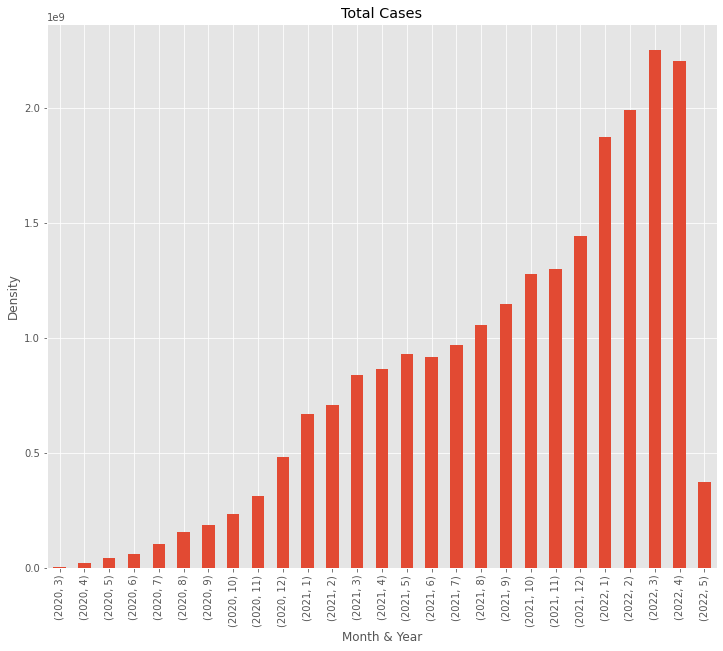

In [99]:
#Creating variable to associate grouping of total cases by month and year
covid_data_groups = covid_data.groupby([covid_data.submission_date.dt.year,covid_data.submission_date.dt.month])['tot_cases'].sum()

#create bar plot by group
covid_data_groups.plot(kind='bar', title='Total Cases',
               ylabel='Density', xlabel='Month & Year', figsize=(12, 10))
    


Looking at the visualization, I can see that there was a high rise in cases between the end of 2021 and beginning of 2022. This high rise in cases can be explained by the Omicron variant as it was highly contagious. The huge decrease in cases in May is explained by the data only containing 6 days of May. 

## Total Deaths by Month & Year

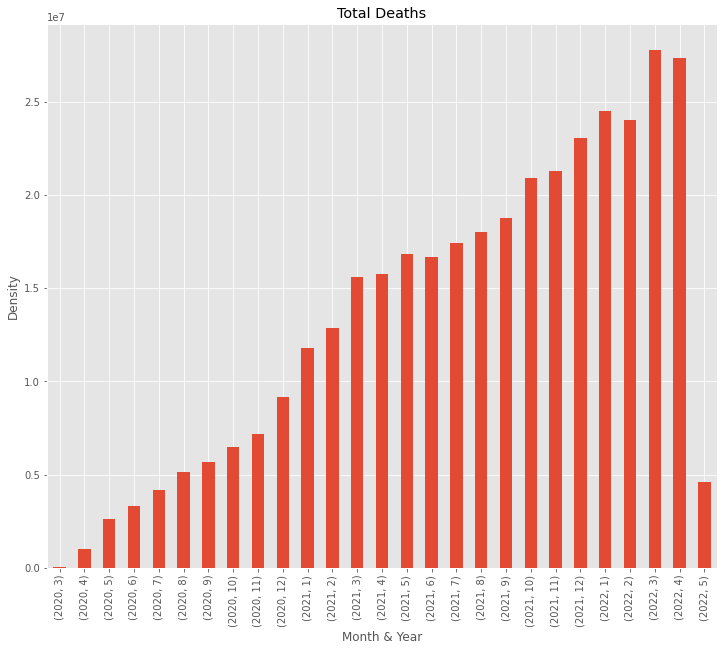

In [100]:
#Creating variable to associate grouping of total deaths by month and year
covid_data_deaths = covid_data.groupby([covid_data.submission_date.dt.year,covid_data.submission_date.dt.month])['tot_death'].sum()

#create bar plot by group
covid_data_deaths.plot(kind='bar', title='Total Deaths',
               ylabel='Density', xlabel='Month & Year', figsize=(12, 10))

While the deaths seem to increase through out the data, the small decreases in deaths can be associated with the vaccine and also some variants being contagious but not deadly. 

## Pie Graph of total cases by gender

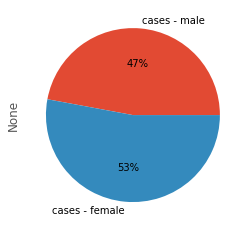

In [101]:
#Plotting Pie Graph of total cases by male and female
covid_data[['cases - male','cases - female']].aggregate('sum').plot(
    kind='pie', y='Number of total cases by gender', autopct='%1.0f%%')

Looking at the data, more females had cases than males.

## Total Hospitalizations by Race in every Month & Year

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


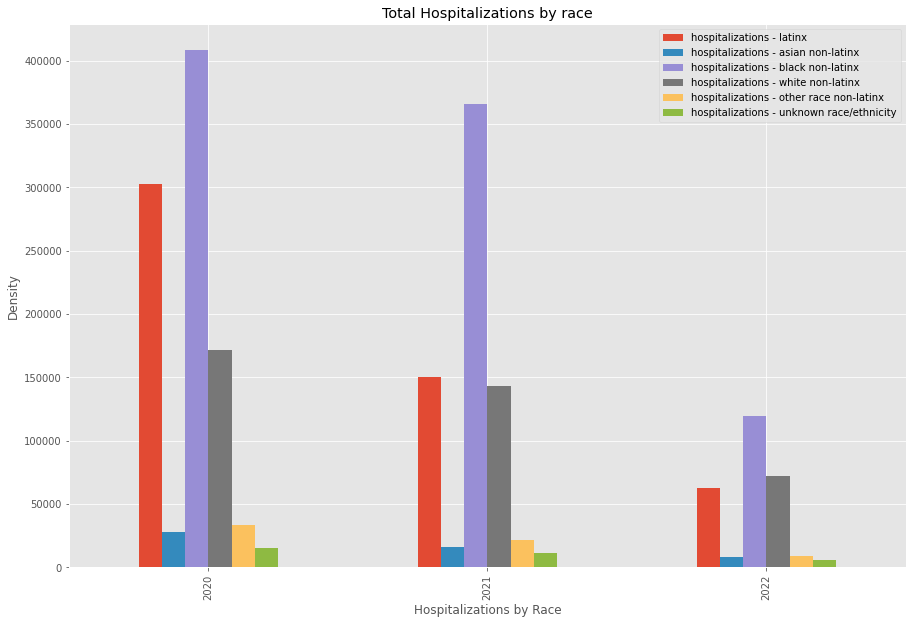

In [57]:
#Plotting bar graph by grouping by month & Year
covid_hospitalizations = covid_data.groupby(covid_data.submission_date.dt.year)['hospitalizations - latinx','hospitalizations - asian non-latinx', 'hospitalizations - black non-latinx',  'hospitalizations - white non-latinx', 'hospitalizations - other race non-latinx', 'hospitalizations - unknown race/ethnicity'].sum()
covid_hospitalizations.plot(kind='bar', title='Total Hospitalizations by race',
               ylabel='Density', xlabel='Hospitalizations by Race', figsize=(15, 10))


Looking at the visualization, it is shown that black non-latinx had the most hospitalizations throughout 2020-2022. This can be explained by them not receiving the proper care they need because of socioeconomic differences. Latinx individuals also had a high number of hospitalizations possibly due to not having the resources to take care of themselves at home. 

## Conclusion

Overall, Covid data analysis is very important to analyze in order to recognize information and draw conclusions to help control the spread of the virus. Additionally, with further analysis into race, gender, socioeconomic status, etc. it can help draw out where healthcare disparities are the worst. The Covid pandemic had shaken the world by its core, and has affected many lives. However, it has also brought up issues in the healthcare and modern world. With analysis of the data due to the pandemic, it is one step closer to try fixing the problrm. 

In [82]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git pull
    !git add AshleySahuFinal.ipynb
    !git commit -a -m "Submitting the Final"
    !git push
else:
    print('''
    
OK. We can wait.
''')

KeyboardInterrupt: 